# College Admission Prediction Project (No Seaborn Version)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('College_Admissions.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


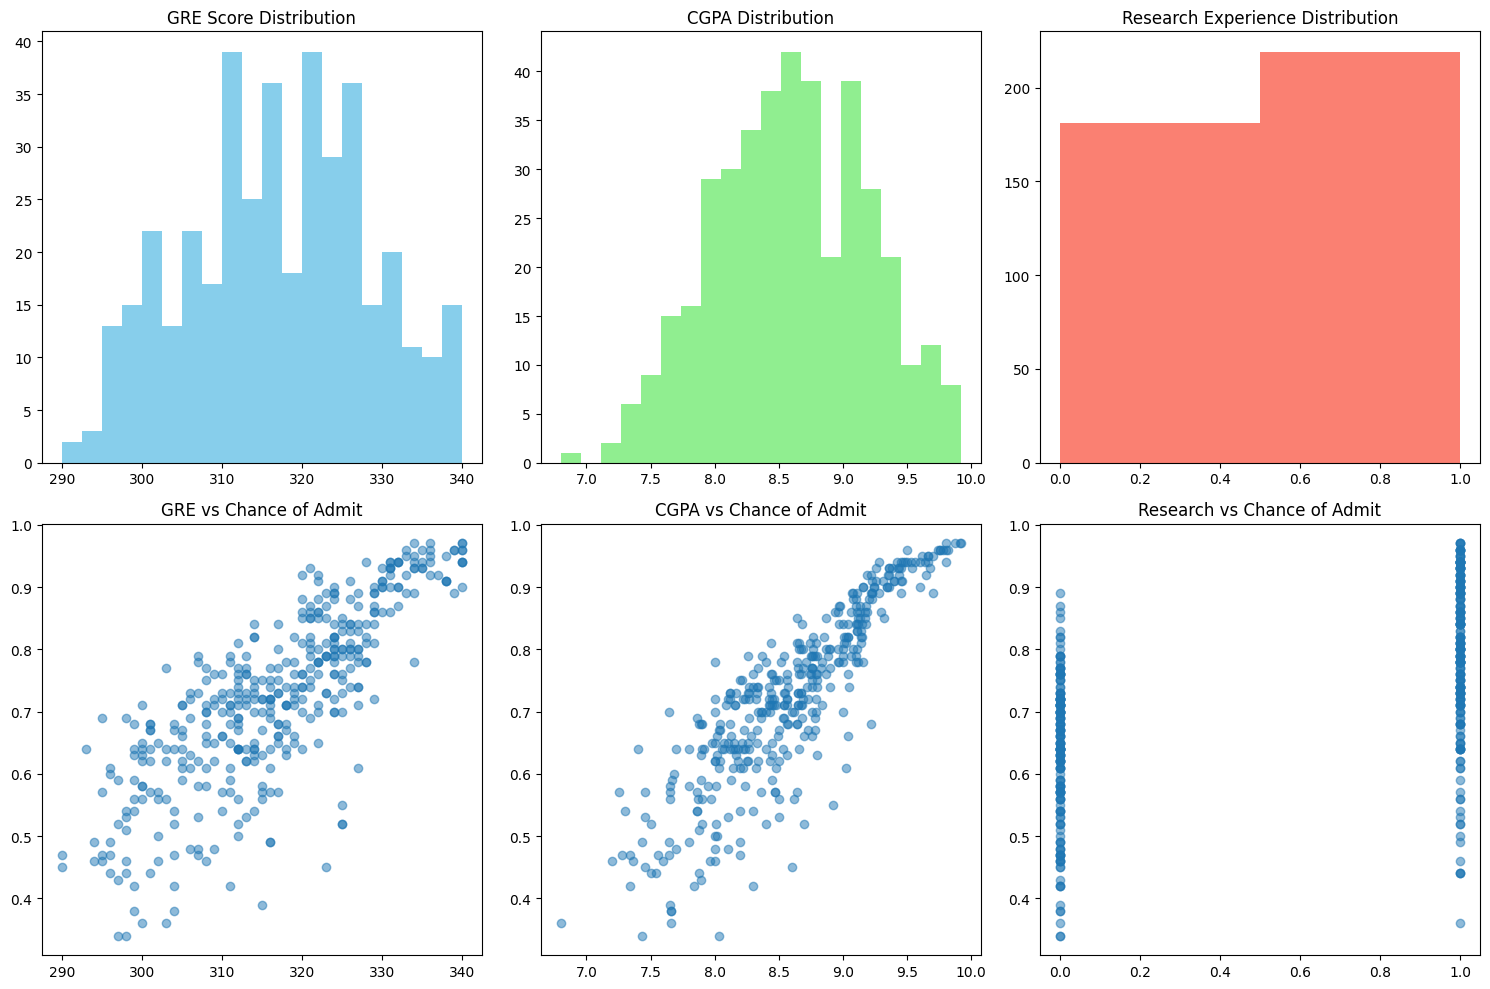

In [ ]:

# Histograms and scatter plots using matplotlib
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0, 0].hist(df['GRE Score'], bins=20, color='skyblue')
axes[0, 0].set_title('GRE Score Distribution')

axes[0, 1].hist(df['CGPA'], bins=20, color='lightgreen')
axes[0, 1].set_title('CGPA Distribution')

axes[0, 2].hist(df['Research'], bins=2, color='salmon')
axes[0, 2].set_title('Research Experience Distribution')

axes[1, 0].scatter(df['GRE Score'], df['Chance of Admit '], alpha=0.5)
axes[1, 0].set_title('GRE vs Chance of Admit')

axes[1, 1].scatter(df['CGPA'], df['Chance of Admit '], alpha=0.5)
axes[1, 1].set_title('CGPA vs Chance of Admit')

axes[1, 2].scatter(df['Research'], df['Chance of Admit '], alpha=0.5)
axes[1, 2].set_title('Research vs Chance of Admit')

plt.tight_layout()
plt.show()


In [3]:
X = df[['GRE Score', 'CGPA', 'Research']]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
mse_train, mse_test

(0.004128128646151942, 0.005194132934919637)

In [4]:
features_full = df.drop(columns=['Serial No.', 'Chance of Admit '])
target = df['Chance of Admit ']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_full)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.2, random_state=42)

pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train_pca)
y_pred_pca = pca_model.predict(X_test_pca)

mse_train_pca = mean_squared_error(y_train_pca, pca_model.predict(X_train_pca))
mse_test_pca = mean_squared_error(y_test_pca, y_pred_pca)
mse_train_pca, mse_test_pca

(0.004483392918982654, 0.005506655657953945)

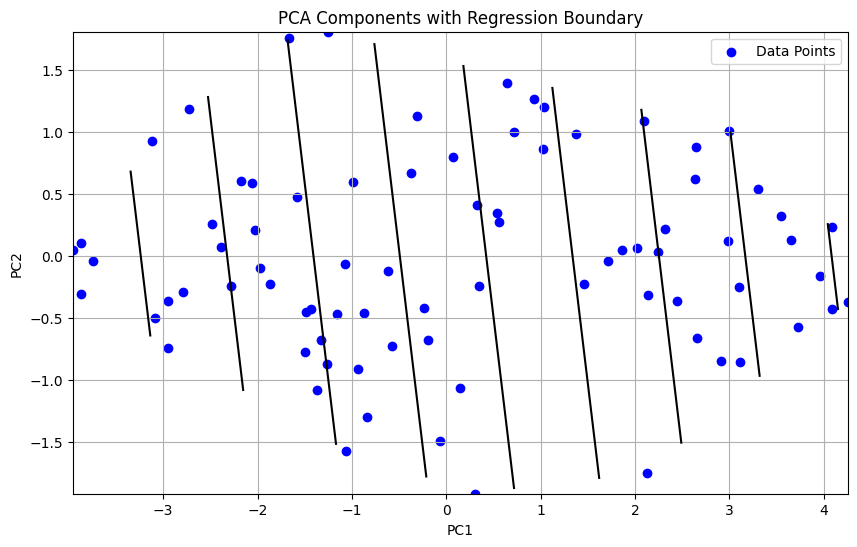

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='blue', label='Data Points')
plt.tricontour(X_test_pca[:, 0], X_test_pca[:, 1], y_pred_pca, levels=10, colors='black')
plt.title('PCA Components with Regression Boundary')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()